# **ABOUT THE DATASET**
In total, we have *27,560* images

The dataset is a folder named "cell_images"

"cell_images" contains 2 subfolders "train" and "test"

"train" and "test" each hold images of parasitized and uninfected cells



# **How To Get The Data**
Step 1: Download zipped file (337MB) from: https://drive.google.com/file/d/1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb/view

Step 2: Extract "cell_images" folder

Step 3: Upload "cell_images" to your google drive to run on Google Colab. Another option is working in a local installation of Jupyter Notebook without uploading anything.

Data citation: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#change path to match your own drive directory
data_dir = "/content/drive/MyDrive/Tutorials Drive/Malaria Classification/cell_images"

In [5]:
#view files and folders in data_dir as a python list
os.listdir(data_dir)

['train', 'test']

In [6]:
#allows to read in image files
from matplotlib.image import imread

In [7]:
#specify test and train directory for later
test_path = data_dir + "/test/"
train_path = data_dir + "/train/"

In [8]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [34]:
#holds only the file name of specified image
para_ex = os.listdir(train_path + 'parasitized')[1000]

In [35]:
#add path to file name to access a specific image
para_cell = imread(train_path + 'parasitized/' + para_ex)

(148, 130, 3)

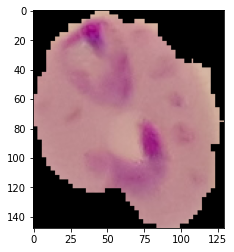

In [36]:
#show image and its shape
plt.imshow(para_cell)
para_cell.shape

In [46]:
#holds only the file name of specified image
uninfected_ex = os.listdir(train_path+'uninfected')[99]

In [47]:
#add path to file name to access a specific image
uninfected_cell = imread(train_path + "uninfected/" + uninfected_ex)

(127, 142, 3)

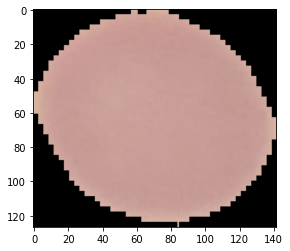

In [48]:
#show imaage and its shape
plt.imshow(uninfected_cell)
uninfected_cell.shape

In [ ]:
'''
the image resolution is inconsistent. Let's examine
takes a while to run on colab


dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + "/uninfected"):
  img = imread(test_path + "/uninfected/" + image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

sns.jointplot(x=dim1,y=dim2)
'''

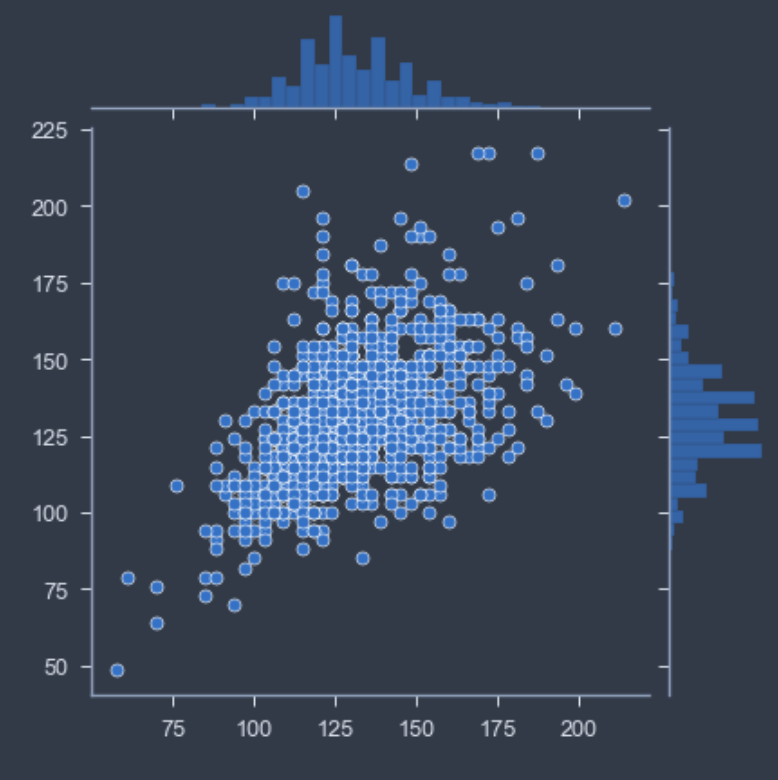

Unlike our previous examples, our data is too much to load into memory.

We will use a **generator** to load data when the AI needs it

In [53]:
#specify shape we want
image_shape = (130,130,3)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
#initialize the generator
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range = 0.1,
                              zoom_range = 0.1,
                              horizontal_flip=True,
                              fill_mode='constant')

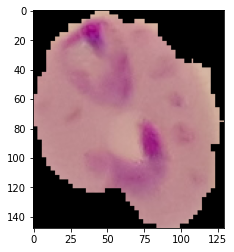

In [61]:
#show para_cell created earlier
plt.imshow(para_cell)

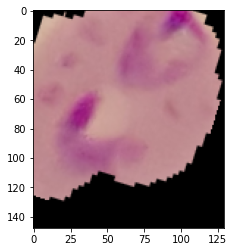

In [64]:
#apply random transform to the image
plt.imshow(image_gen.random_transform(para_cell))

In [ ]:
#Have a great day :)